<a href="https://colab.research.google.com/github/harshal177/STOCK-PREDICTION/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow


# Import all the required libraries

---



In [2]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [3]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04 00:00:00+00:00,299.054230,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05 00:00:00+00:00,299.133759,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06 00:00:00+00:00,292.369965,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07 00:00:00+00:00,284.233765,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08 00:00:00+00:00,278.424957,349.899994,359.250000,348.250000,358.000000,6048178


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_13744\1616842492.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178


Visualizing Closing Price

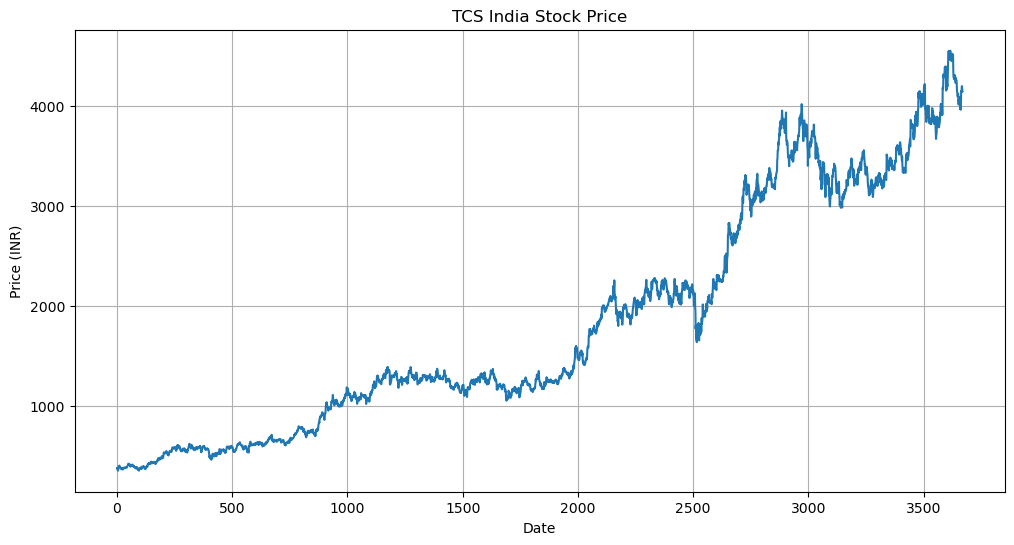

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [7]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178
...,...,...,...,...,...
3665,4147.000000,4169.750000,4117.649902,4155.000000,1648039
3666,4198.700195,4234.299805,4117.649902,4128.200195,1406487
3667,4197.399902,4218.000000,4164.350098,4216.000000,1587640


# Plotting moving averages of 100 day

---



In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3665,4221.610991
3666,4225.580994
3667,4229.682493
3668,4233.078494


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

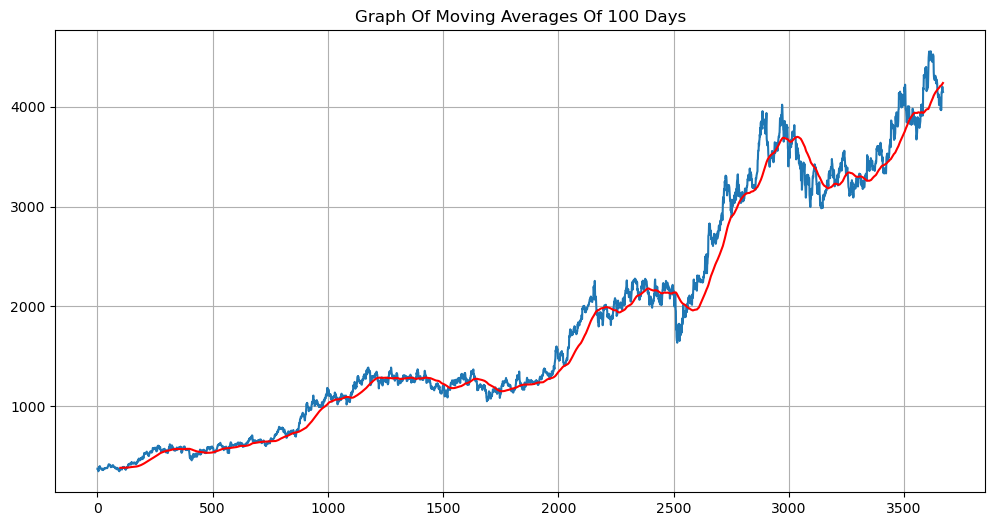

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3665,4081.701249
3666,4083.271749
3667,4084.745748
3668,4085.782249


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

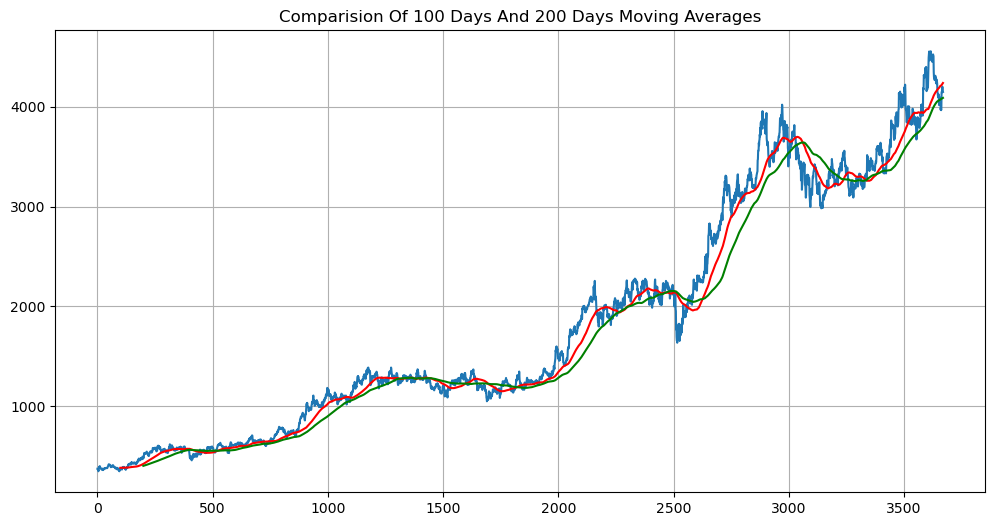

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [12]:
df.shape

(3670, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [13]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2569, 7)
(1101, 7)


In [14]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04 00:00:00+00:00,299.054230,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05 00:00:00+00:00,299.133759,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06 00:00:00+00:00,292.369965,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07 00:00:00+00:00,284.233765,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08 00:00:00+00:00,278.424957,349.899994,359.250000,348.250000,358.000000,6048178


In [15]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2569,2020-06-10 00:00:00+00:00,1980.693115,2108.750000,2132.000000,2073.500000,2077.050049,5168397
2570,2020-06-11 00:00:00+00:00,1942.088623,2067.649902,2105.000000,2061.800049,2100.000000,2269513
2571,2020-06-12 00:00:00+00:00,1915.648438,2039.500000,2049.199951,2011.000000,2011.199951,2842642
2572,2020-06-15 00:00:00+00:00,1906.630981,2029.900024,2059.000000,2000.949951,2039.099976,2399022
2573,2020-06-16 00:00:00+00:00,1921.565796,2045.800049,2073.949951,2031.000000,2065.000000,2146528


# Using MinMax scaler for normalization of the dataset

---



In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [18]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01671754],
       [0.01606246],
       [0.01251195],
       ...,
       [0.88968517],
       [0.90110973],
       [0.90014016]])

In [19]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [20]:
x_train.shape

(2469, 100, 1)

# ML Model (LSTM)

---



In [21]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [24]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - loss: 0.0919 - mean_absolute_error: 0.2154
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 0.0096 - mean_absolute_error: 0.0673
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 0.0083 - mean_absolute_error: 0.0637
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0063 - mean_absolute_error: 0.0564
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.0068 - mean_absolute_error: 0.0568
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0072 - mean_absolute_error: 0.0597
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.0064 - mean_absolute_error: 0.0577
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0056 - mean_absolute_error: 0.0516
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 0.0046 - mean_absolute_error: 0.0469
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0055 - mean_absolute_error: 0.0516
Epoch 11/100
78/78

In [25]:
model.save('keras_model.h5')

In [26]:
test_close.shape

(1101, 1)

In [27]:
past_100_days = pd.DataFrame(train_close[-100:])

In [28]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [29]:
# Concatenate past_100_days and test_df using pd.concat
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [30]:
final_df.head()

,0
0,2208.000000
1,2184.699951
2,2195.000000
3,2194.199951
4,2215.000000


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.23352017],
       [0.22576886],
       [0.22919542],
       ...,
       [0.88434608],
       [0.87326795],
       [0.86841105]])

In [32]:
input_data.shape

(1201, 1)

# Testing the model

---



In [33]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1101, 100, 1)
(1101,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [35]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


In [36]:
y_pred.shape

(1101, 1)

In [37]:
y_test

array([0.18877558, 0.18488332, 0.16798349, ..., 0.88434608, 0.87326795,
       0.86841105])

In [38]:
y_pred

array([[0.22283661],
       [0.2262418 ],
       [0.22975352],
       ...,
       [0.8520506 ],
       [0.8623488 ],
       [0.87140846]], dtype=float32)

In [39]:
scaler.scale_

array([0.00033267])

In [40]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

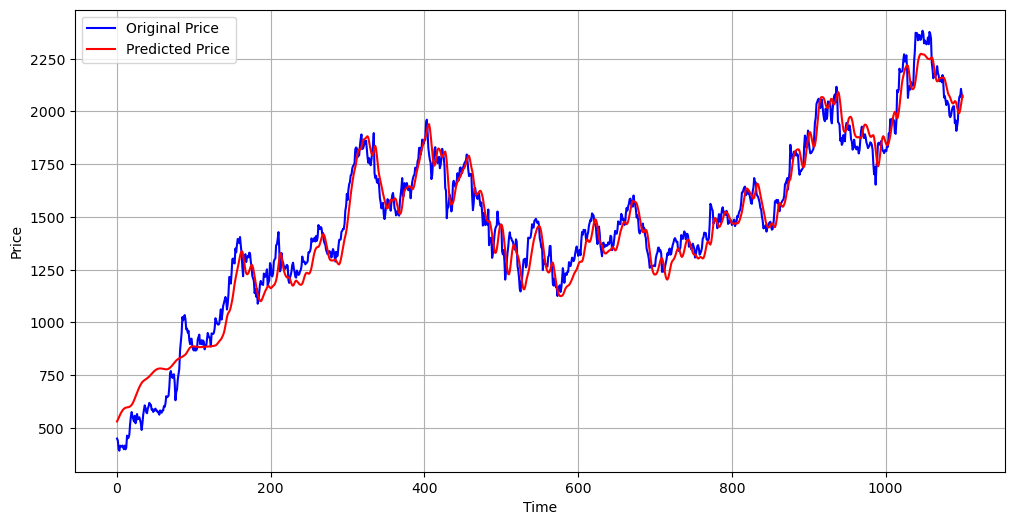

In [41]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [42]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 4.42%


Calculation of R2 score

In [43]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9587169695460711


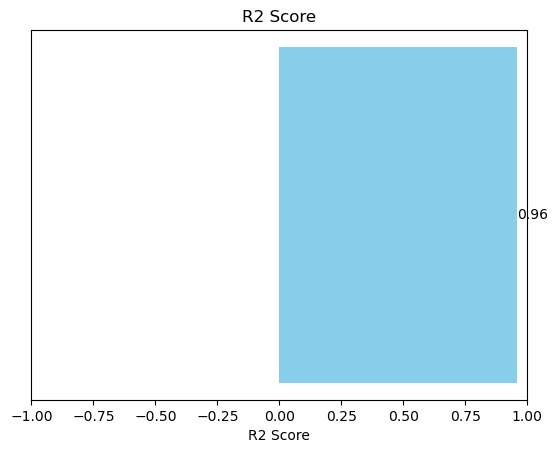

In [44]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

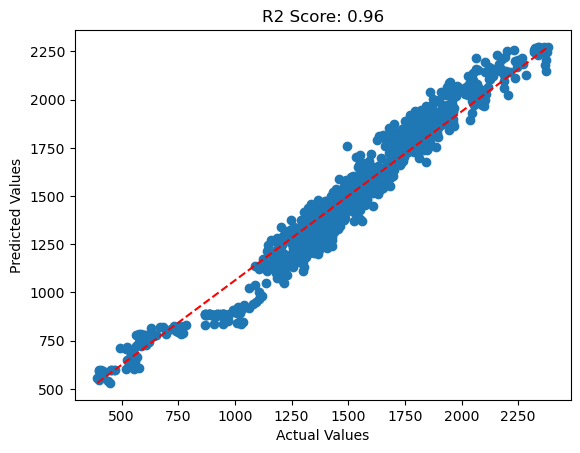

In [45]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

In [46]:
# def predict_next_day_from_single_input(input_value, feature_type, model, scaler):
#     """
#     Predict the stock price for the next day based on a single input feature value
#     (Open, High, Low, Close, or Adjusted Close) using the pre-trained LSTM model.

#     Parameters:
#     input_value (float): Value of the selected feature (e.g., Open, Close, High, Low, or Adjusted Close).
#     feature_type (str): Type of the feature ('Open', 'High', 'Low', 'Close', or 'Adj Close').
#     model (Keras model): Trained LSTM model.
#     scaler (MinMaxScaler): The scaler used to normalize the data.

#     Returns:
#     float: Predicted stock price for the next day.
#     """

#     # Create a DataFrame with the input value for the specified feature type
#     input_data = pd.DataFrame([[input_value]], columns=[feature_type])

#     # Scale the input data using the same scaler used during training
#     scaled_input = scaler.transform(input_data)

#     # Reshape the input for the LSTM model (1 sample, 1 timestep, 1 feature)
#     x_input = scaled_input.reshape(1, 1, 1)

#     # Make the prediction for the next day
#     predicted_price_scaled = model.predict(x_input)

#     # Reverse the scaling to get the original price
#     scale_factor = 1 / scaler.scale_[0]  # Retrieve scale factor for inverse scaling
#     predicted_price = predicted_price_scaled * scale_factor

#     # Return the predicted price for the next day
#     return predicted_price[0][0]


In [47]:
# # Example usage: Predict the next day's stock price using the Close price
# input_value = 1005  # Example Close price
# feature_type = 'Close'  # The feature you're using ('Open', 'Close', 'High', 'Low', or 'Adj Close')

# # Call the prediction function
# predicted_price = predict_next_day_from_single_input(input_value, feature_type, model, scaler)

# print(f"Predicted stock price for the next day based on {feature_type}: {predicted_price:.2f} INR")

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
Predicted stock price for the next day based on Close: 1092.50 INR


Model saved as keras_model.h5
Preprocessor saved as preprocessor.pkl
